In [4]:
!pip install seaborn

In [5]:
import seaborn as sns

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/aula2/projects.csv')
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [9]:
swap = {
    0: 1,
    1: 0
}
df['finished'] = df['unfinished'].map(swap)
df.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


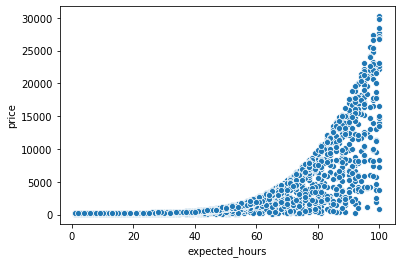

In [10]:
sns.scatterplot(x='expected_hours', y='price', data=df)

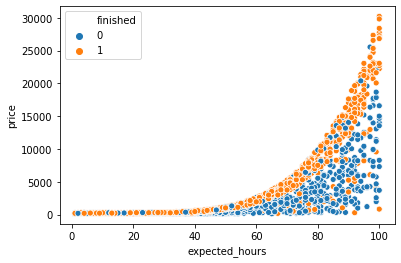

In [11]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=df)

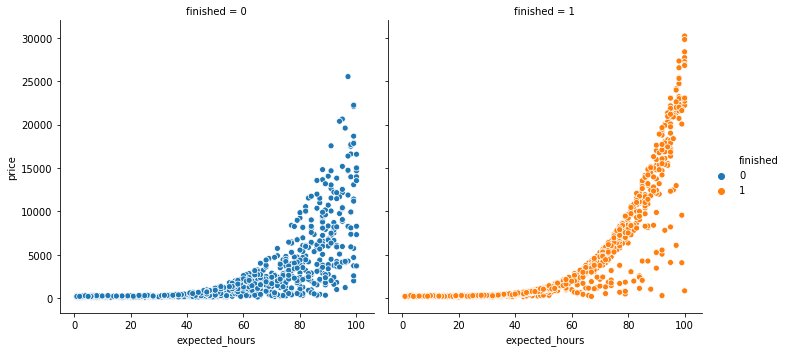

In [12]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=df)

In [15]:
x = df[['expected_hours', 'price']]
y = df['finished']

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

#model = LinearSVC(random_state=20)
model = SVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 58.88888888888889


/Users/lucheol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
df.shape

(2157, 4)

In [27]:
len(teste_y)

540

In [28]:
baseline = pd.np.ones(540) # se eu chutar que os 540 testes serão sempre 1, qual minha taxa de accuracy?

In [29]:
accuracy_score(teste_y, baseline)

0.5259259259259259

In [38]:
x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()

x_min, x_max, y_min, y_max

(1, 100, 101, 27738)

In [47]:
eixo_x = pd.np.arange(x_min, x_max, (x_max - x_min)/100)
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [48]:
eixo_y = pd.np.arange(y_min, y_max, (y_max - y_min)/100)
eixo_y

array([  101.  ,   377.37,   653.74,   930.11,  1206.48,  1482.85,
        1759.22,  2035.59,  2311.96,  2588.33,  2864.7 ,  3141.07,
        3417.44,  3693.81,  3970.18,  4246.55,  4522.92,  4799.29,
        5075.66,  5352.03,  5628.4 ,  5904.77,  6181.14,  6457.51,
        6733.88,  7010.25,  7286.62,  7562.99,  7839.36,  8115.73,
        8392.1 ,  8668.47,  8944.84,  9221.21,  9497.58,  9773.95,
       10050.32, 10326.69, 10603.06, 10879.43, 11155.8 , 11432.17,
       11708.54, 11984.91, 12261.28, 12537.65, 12814.02, 13090.39,
       13366.76, 13643.13, 13919.5 , 14195.87, 14472.24, 14748.61,
       15024.98, 15301.35, 15577.72, 15854.09, 16130.46, 16406.83,
       16683.2 , 16959.57, 17235.94, 17512.31, 17788.68, 18065.05,
       18341.42, 18617.79, 18894.16, 19170.53, 19446.9 , 19723.27,
       19999.64, 20276.01, 20552.38, 20828.75, 21105.12, 21381.49,
       21657.86, 21934.23, 22210.6 , 22486.97, 22763.34, 23039.71,
       23316.08, 23592.45, 23868.82, 24145.19, 24421.56, 24697

In [53]:
xx, yy = pd.np.meshgrid(eixo_x, eixo_y)
xx, yy

(array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        ...,
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]]),
 array([[  101.  ,   101.  ,   101.  , ...,   101.  ,   101.  ,   101.  ],
        [  377.37,   377.37,   377.37, ...,   377.37,   377.37,   377.37],
        [  653.74,   653.74,   653.74, ...,   653.74,   653.74,   653.74],
        ...,
        [26908.89, 26908.89, 26908.89, ..., 26908.89, 26908.89, 26908.89],
        [27185.26, 27185.26, 27185.26, ..., 27185.26, 27185.26, 27185.26],
        [27461.63, 27461.63, 27461.63, ..., 27461.63, 27461.63, 27461.63]]))

In [59]:
pontos = pd.np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [115]:
z = model.predict(pontos)
z

array([0, 0, 0, ..., 1, 1, 1])

In [116]:
z.shape

(10000,)

In [117]:
xx.shape

(100, 100)

In [118]:
z1 = z.reshape((100,100))
z1

array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

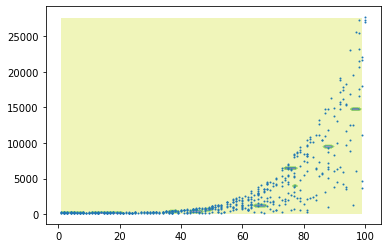

In [119]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy, z1,alpha=0.3)
plt.scatter(teste_x['expected_hours'], teste_x['price'], s=1)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 70.37037037037037


In [149]:
data_x_hours = treino_x[:,0]
data_y_price = treino_x[:,1]

In [150]:
x_min = data_x_hours.min()
x_max = data_x_hours.max()
y_min = data_y_price.min()
y_max = data_y_price.max()

eixo_x = pd.np.arange(x_min, x_max, (x_max - x_min)/100)
eixo_y = pd.np.arange(y_min, y_max, (y_max - y_min)/100)

xx, yy = pd.np.meshgrid(eixo_x, eixo_y)
pontos = pd.np.c_[xx.ravel(), yy.ravel()]

In [151]:
z = model.predict(pontos)
z = z.reshape(xx.shape) # (xx.shape == (100,000)) https://www.w3resource.com/w3r_images/numpy-manipulation-reshape-function-image-1.png

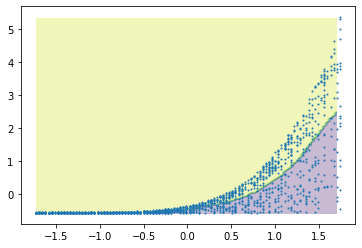

In [155]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x_hours, data_y_price,s=1)